In [ ]:
# prev code on Colab: https://colab.research.google.com/drive/18W-1LZMpiW13uEp3R0REFpJvWglQc2ir?usp=sharing

In [25]:
# Importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
from statsmodels.tsa.api import VAR
import numpy as np
sns.set()

In [26]:
data = pd.read_excel('NEER_Economic_Indicators.xlsx', sheet_name = 'main')

data #date format is in YYYY-DD-MM

data.date = pd.to_datetime(data.date.astype(str), format = '%Y-%d-%m') #convert to correct datetime format

data.index = data.date
data.drop('date', inplace=True, axis = 1)

In [27]:
def tsplot(y, lags=50, figsize=(10, 8), title='Time Series Analysis Plots', style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))    
        y.plot(ax=ts_ax)
        p_value = sm.adfuller(y)[1]
        ts_ax.set_title(f'{title}\n Dickey-Fuller: p={p_value:.5f}')
        sm.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        sm.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        plt.tight_layout()
    return

In [28]:
#Consider past 10 years data, from Jan 2011 to Feb 2011
start_date = '2011-01-01'
end_date = '2021-02-01'
data=data.loc[start_date:end_date]

In [31]:
data = data.iloc[:,:-6] # remove last few columns that had NaN values

In [32]:
data

,neer,cpi_adjusted,export_price_index,import_price_index,export_price_index_machinery,export_price_index_manufactured,export_price_index_chem,export_price_index_misc_manufactured,export_price_index_mineral_fuels,cpi_adjusted_food,...,cpi_adjusted_education,cpi_adjusted_healthcare,cpi_adjusted_transport,cpi_adjusted_communication,cpi_adjusted_recreation,cpi_adjusted_housing_utilities,import_price_index_food&animals,import_price_index_manufacturedgoods,import_price_index_machinery,import_price_index_crudematerials
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,114.5650,90.214,111.960,113.030,111.832,109.235,104.293,98.961,121.899,84.240,...,76.141,83.435,93.135,103.666,91.674,96.682,100.239,109.882,108.751,127.989
2011-02-01,114.8700,90.261,113.635,115.507,111.333,111.804,105.348,97.977,130.476,84.534,...,76.481,83.581,90.996,103.532,91.868,97.242,100.988,111.629,108.750,133.227
2011-03-01,114.9250,90.341,115.333,116.868,109.971,111.402,106.163,98.354,142.362,84.862,...,76.678,83.617,90.491,103.131,92.355,97.926,100.879,111.632,108.286,126.073
2011-04-01,115.8080,91.316,116.138,117.220,109.169,111.878,106.324,97.863,148.487,85.220,...,76.795,83.825,92.083,103.074,92.552,100.329,101.632,111.715,106.711,130.438
2011-05-01,116.3100,91.182,113.871,115.186,108.145,109.083,105.877,97.459,140.853,85.230,...,76.989,83.850,91.577,103.077,92.253,100.243,101.383,110.643,106.170,127.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,125.7740,100.027,90.118,90.992,98.538,98.255,90.592,101.658,62.131,102.224,...,99.888,98.514,100.134,101.125,97.850,99.924,101.434,99.434,100.074,101.795
2020-11-01,125.6000,99.938,89.746,91.761,96.657,99.053,91.392,100.650,64.455,102.406,...,100.081,98.636,100.026,100.944,97.953,99.402,101.820,100.249,99.773,101.517
2020-12-01,125.4375,100.301,90.472,93.418,95.872,100.772,92.000,99.676,69.859,102.472,...,100.206,98.567,101.732,101.010,97.503,99.462,102.246,100.754,99.651,101.496


In [33]:
data.columns.values.tolist()

['neer',
 'cpi_adjusted',
 'export_price_index',
 'import_price_index',
 'export_price_index_machinery',
 'export_price_index_manufactured',
 'export_price_index_chem',
 'export_price_index_misc_manufactured',
 'export_price_index_mineral_fuels',
 'cpi_adjusted_food',
 'cpi_adjusted_clothing_footwear',
 'cpi_adjusted_household_durables',
 'cpi_adjusted_misc',
 'cpi_adjusted_education',
 'cpi_adjusted_healthcare',
 'cpi_adjusted_transport',
 'cpi_adjusted_communication',
 'cpi_adjusted_recreation',
 'cpi_adjusted_housing_utilities',
 'import_price_index_food&animals',
 'import_price_index_manufacturedgoods',
 'import_price_index_machinery',
 'import_price_index_crudematerials']

In [9]:
focused_columns = ['neer', 'cpi_adjusted', 'export_price_index', 'import_price_index'] # NEER with main economic indicators

### To check which data transformation to use for export_price_index and import_price_index

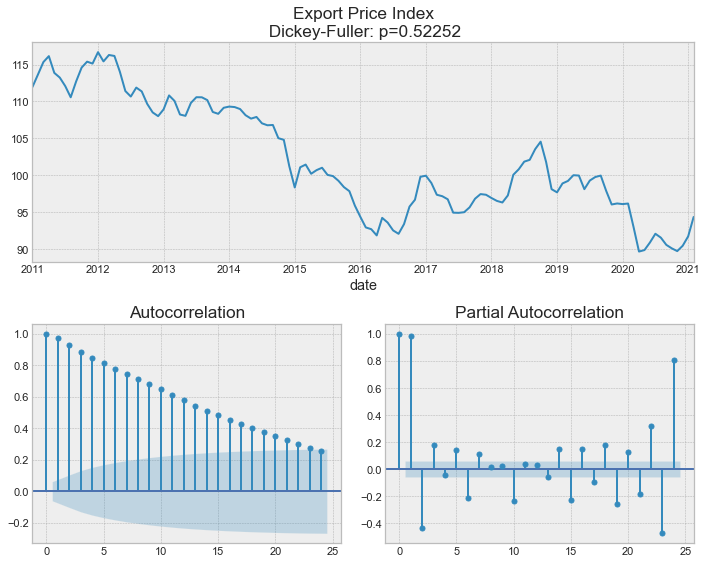

In [12]:
# Data transformation
tsplot(data.export_price_index, lags=24, title='Export Price Index')

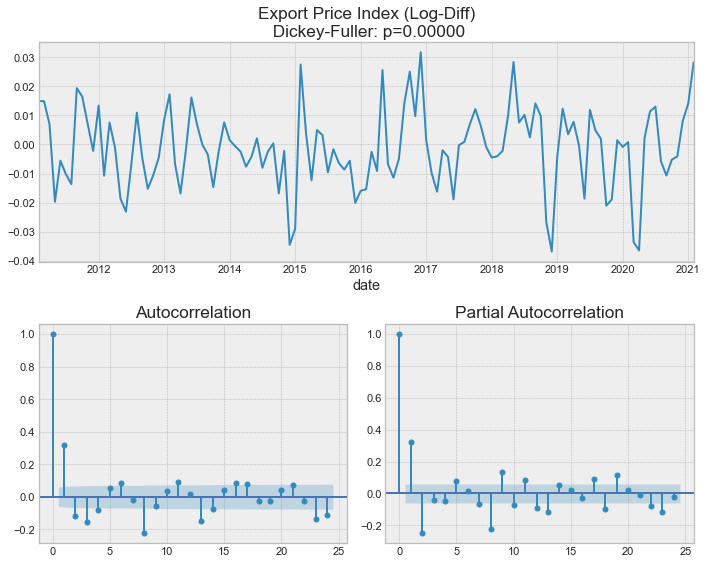

In [13]:
tsplot(np.log(data.export_price_index).diff().dropna(), lags=24, title = 'Export Price Index (Log-Diff)')

C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


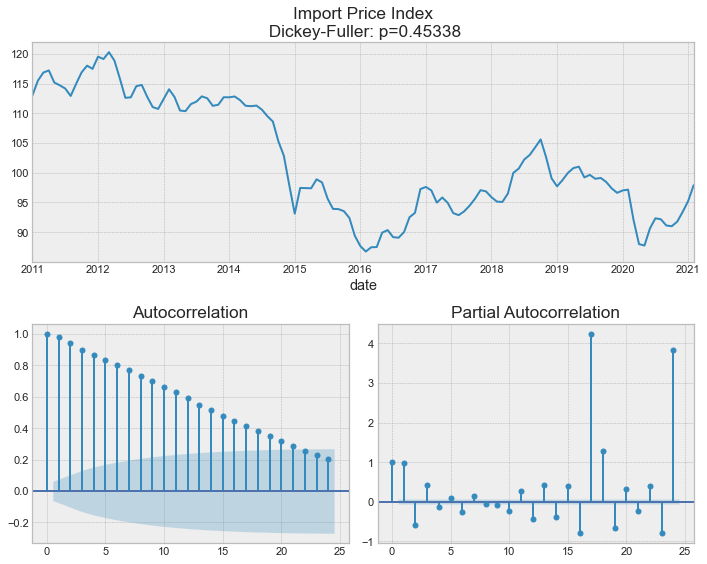

In [14]:
# Data transformation
tsplot(data.import_price_index, lags=24, title='Import Price Index')

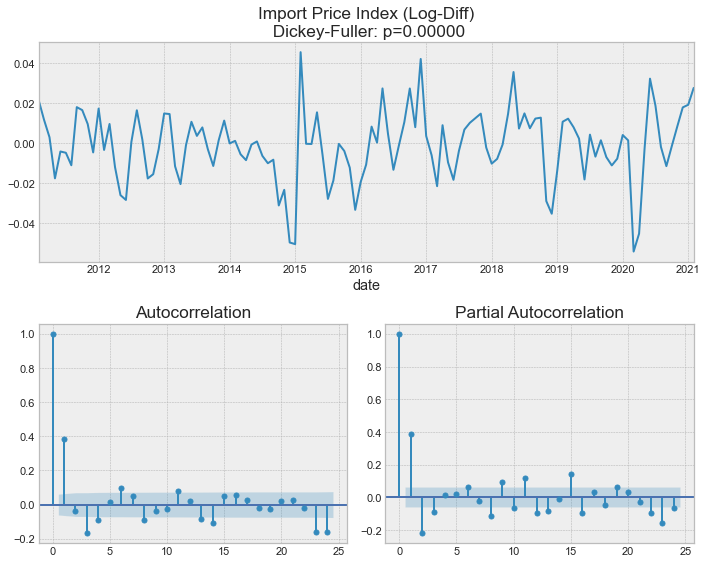

In [15]:
tsplot(np.log(data.import_price_index).diff().dropna(), lags=24, title = 'Import Price Index (Log-Diff)')

In [16]:
# taking only subset of dataframe
focused_data = data[focused_columns]

In [17]:
focused_data = np.log(focused_data + 1)
focused_data[['neer','export_price_index', 'import_price_index']] = focused_data[['neer','export_price_index', 'import_price_index']].diff().dropna()
focused_data = focused_data.dropna()
focused_data

,neer,cpi_adjusted,export_price_index,import_price_index
date,,,,
2011-02-01,0.002636,4.513724,0.014719,0.021490
2011-03-01,0.000475,4.514600,0.014704,0.011614
2011-04-01,0.007588,4.525217,0.006896,0.002982
2011-05-01,0.004288,4.523765,-0.019543,-0.017355
2011-06-01,0.003085,4.526214,-0.005535,-0.004062
...,...,...,...,...
2020-10-01,0.000959,4.615388,-0.005178,-0.001325
2020-11-01,-0.001373,4.614506,-0.004091,0.008325
2020-12-01,-0.001284,4.618096,0.007969,0.017705


In [21]:
def write_results(file_name, results, columns):
    with open(file_name,"w") as fw:
        print(results.summary(), file=fw)
        fw.write("================test_whiteness================\n")
        print(results.test_whiteness(), file=fw)
        fw.write("================results.roots()================\n")
        for root in results.roots:
            fw.write(str(root)+",")
        fw.write("\n================is_stable================\n")
        fw.write(str(results.is_stable()))
        fw.write("\n================granger causality================\n")
        for V1 in columns:
            for V2 in columns:
                fw.write("Granger test: "+V2+"-->"+V1+"\n")
                print(results.test_causality(V1, [V2],kind='f').summary(), file=fw)
                fw.write("\n")

        fw.write("\n================long_run effects================\n")
        for effect in results.long_run_effects():
            fw.write(str(effect)+",")
        fw.write("\n================FEVD values================\n")
        print(results.fevd(20).summary,file=fw)

def structural_analyses(file_name, results, lag=20):

    # impulse response analyses
    irf = results.irf(lag)
    fig1 = irf.plot(orth=False)
    plt.savefig(file_name+"_irf_noorth.png")
    # irf.plot(impulse='V1', response="V2")
    fig2 = irf.plot_cum_effects(orth=False)
    plt.savefig(file_name+"_irf_cum_noorth.png")
    results.long_run_effects()

    col = sns.color_palette("hls", 11)
    # forecast error decomposition
    results.fevd(lag).plot()
    plt.savefig(file_name+"_fevd.png")
    fig1.set_figheight(20)
    fig1.set_figwidth(25)
    fig2.set_figheight(20)
    fig2.set_figwidth(25)

In [20]:
model = VAR(focused_data)
print(model.select_order(10).summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -38.19      -38.09   2.598e-17      -38.15
1      -41.49*     -41.00*  9.563e-19*     -41.29*
2       -41.44      -40.56   1.007e-18      -41.08
3       -41.35      -40.08   1.111e-18      -40.83
4       -41.28      -39.62   1.189e-18      -40.61
5       -41.08      -39.03   1.467e-18      -40.25
6       -40.95      -38.51   1.698e-18      -39.96
7       -40.72      -37.88   2.181e-18      -39.57
8       -40.65      -37.43   2.384e-18      -39.34
9       -40.48      -36.86   2.934e-18      -39.01
10      -40.70      -36.70   2.442e-18      -39.08
--------------------------------------------------


C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [22]:
orders = [1]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 156.104, critical value: 173.004>, p-value: 0.232>


In [23]:
selected_order = 1
results = model.fit(selected_order) # trend="c" by default
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 19, Apr, 2021
Time:                     11:43:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -40.7408
Nobs:                     120.000    HQIC:                  -41.0167
Log likelihood:           1811.23    FPE:                1.27295e-18
AIC:                     -41.2054    Det(Omega_mle):     1.08118e-18
--------------------------------------------------------------------
Results for equation neer
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.069954         0.087246            0.802           0.423
L1.neer                       0.275500         0.098080            2.809           0.005
L1.cpi_adjusted              

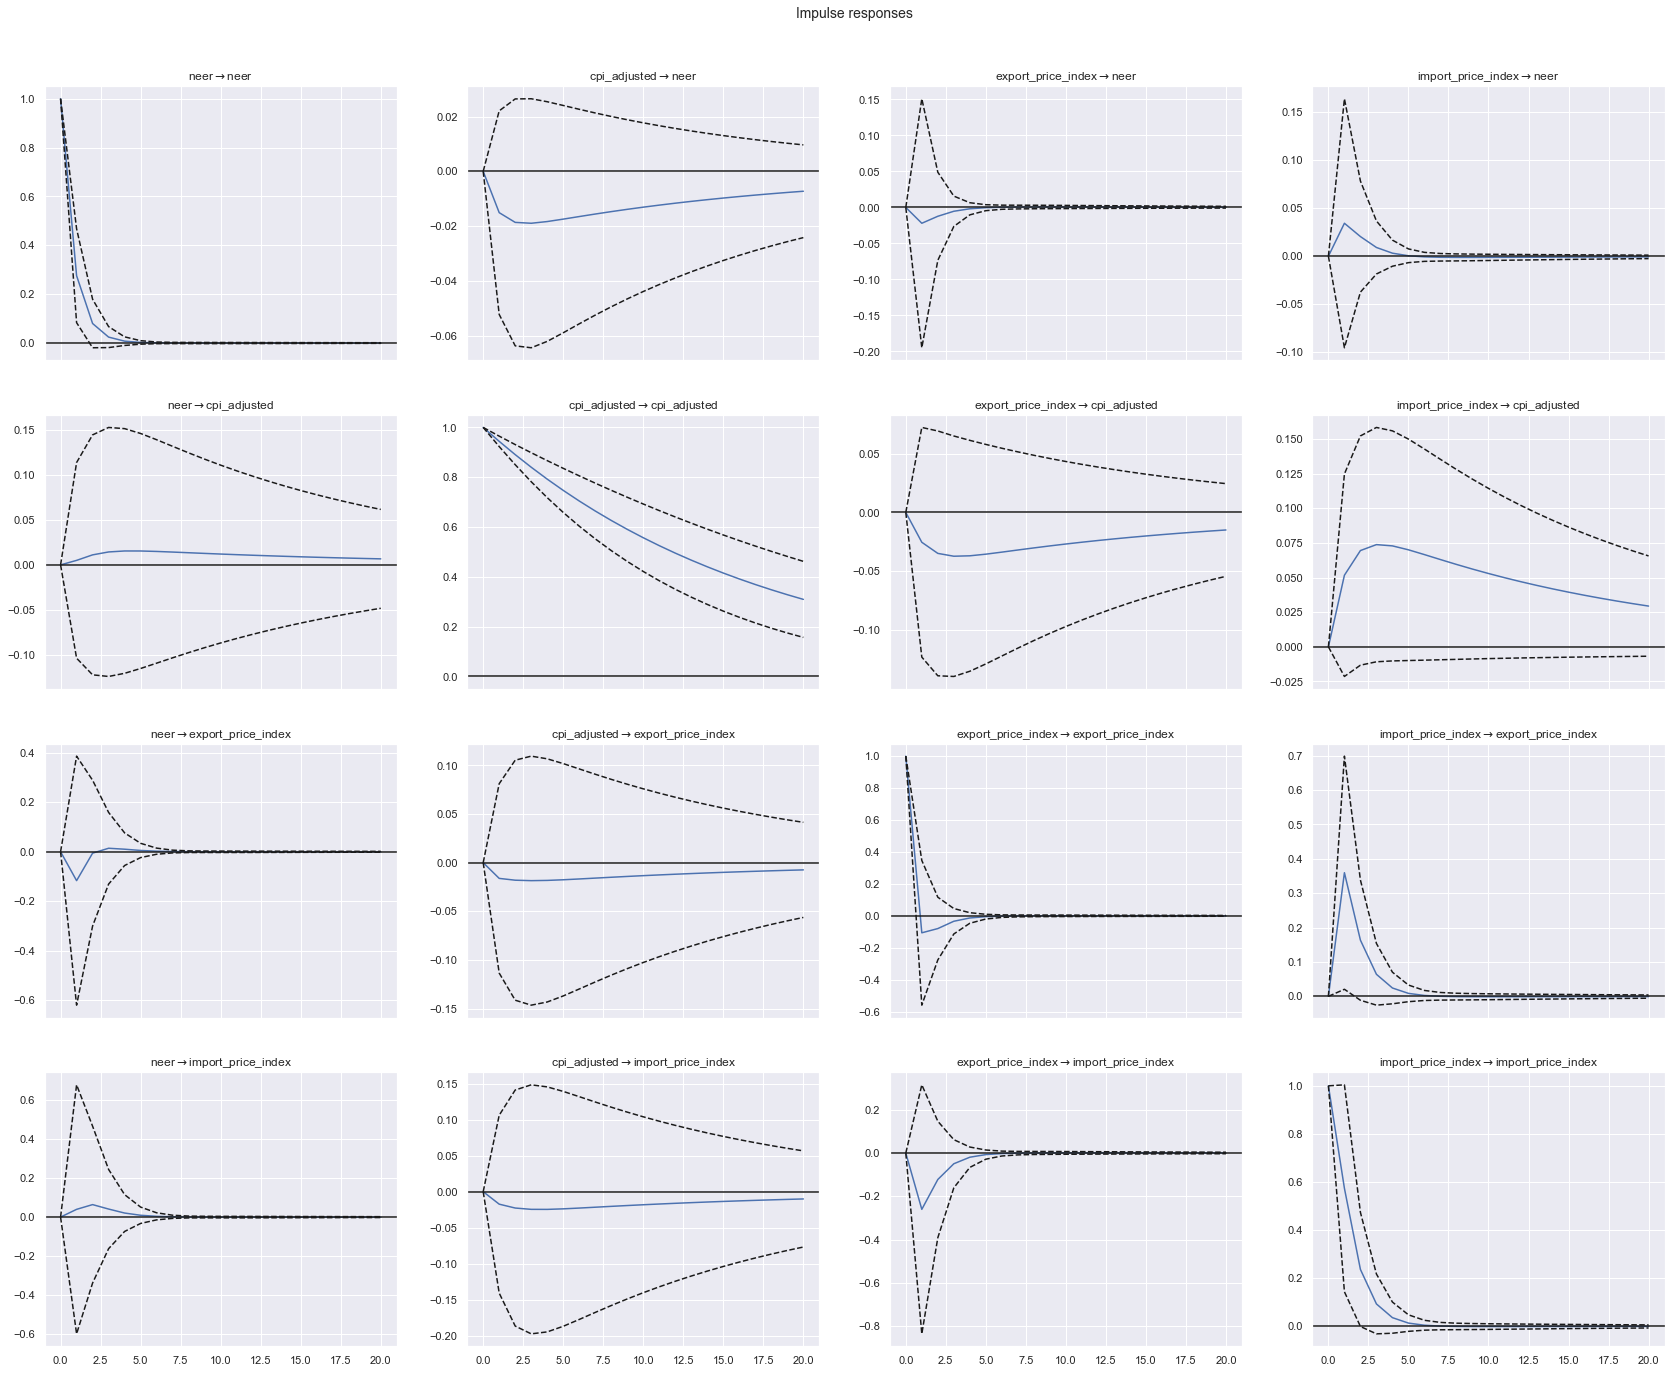

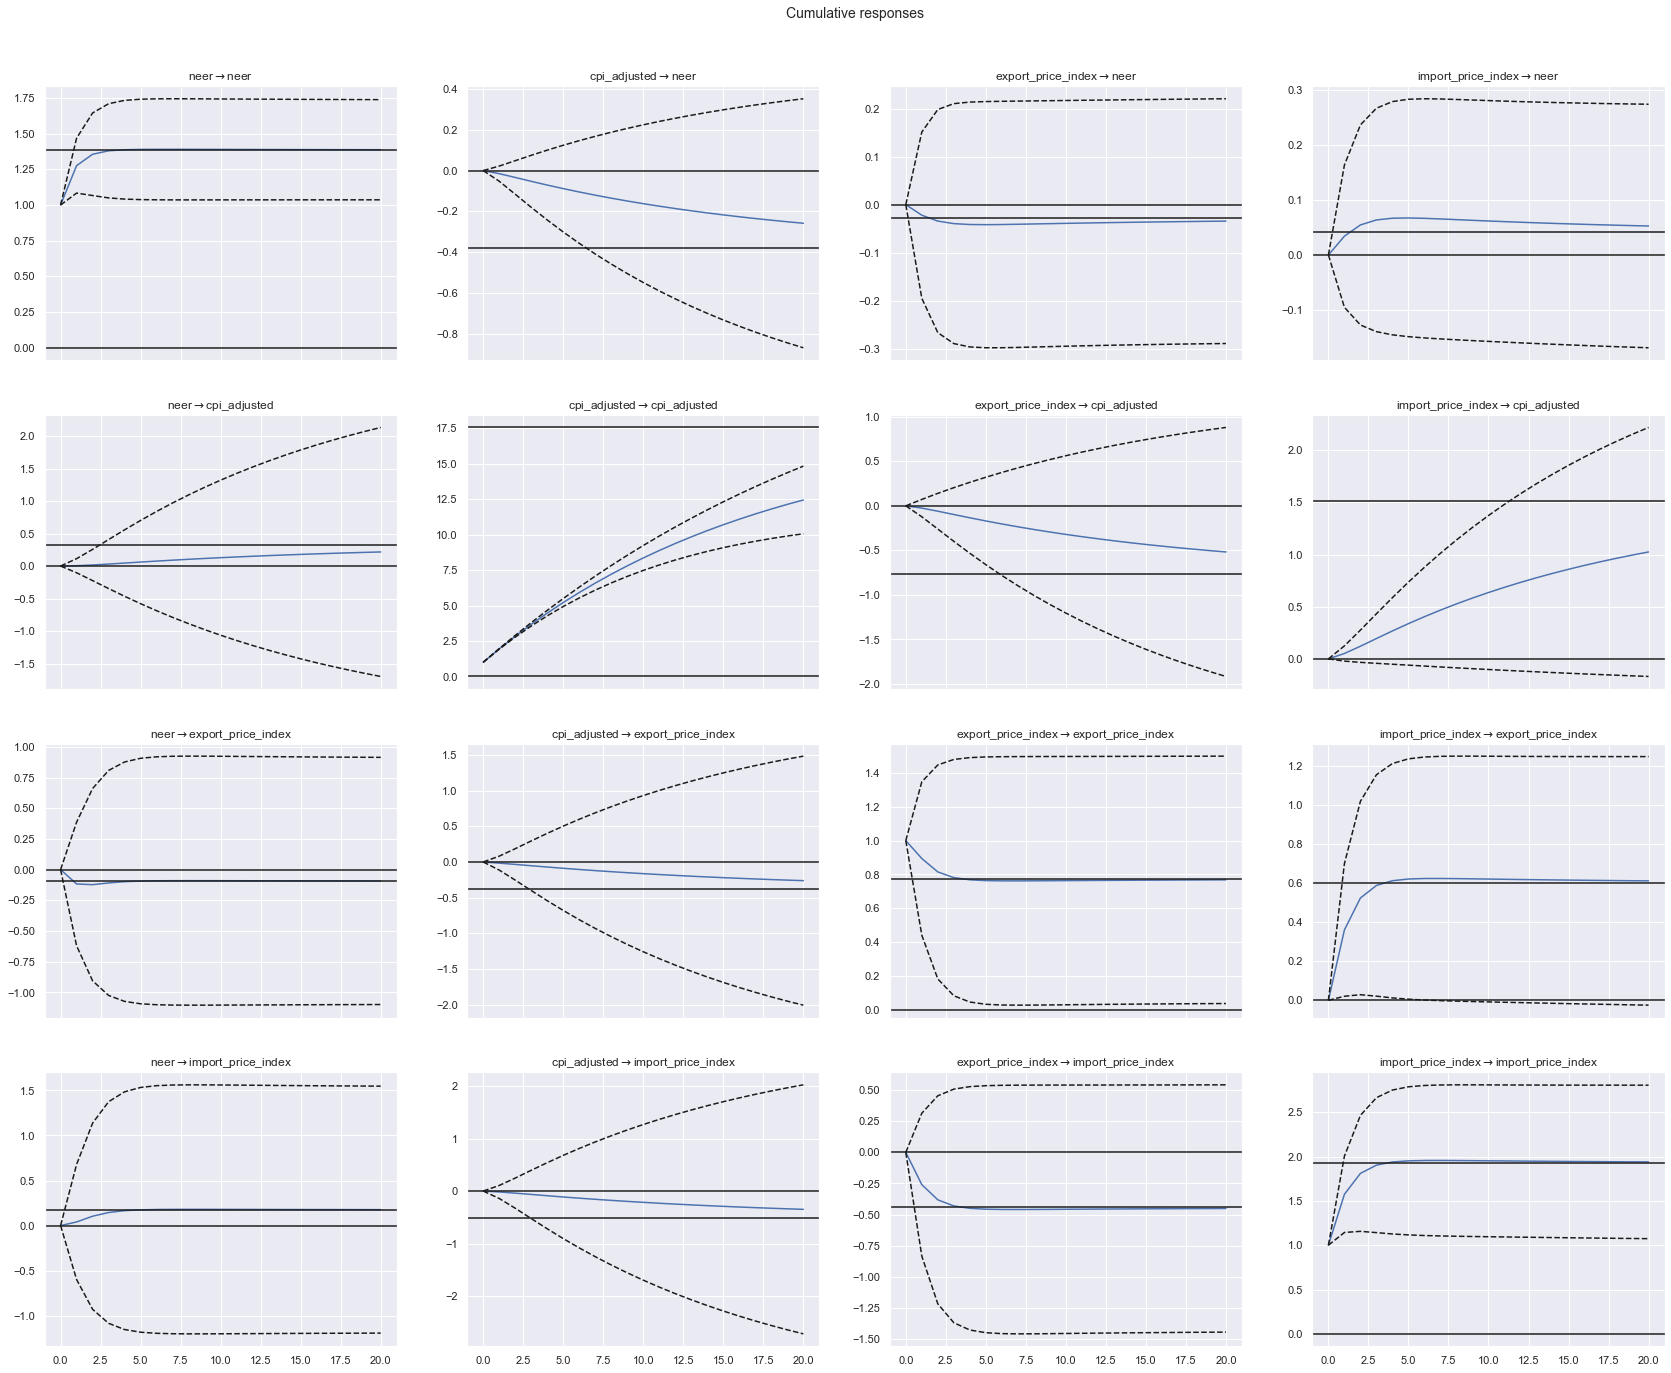

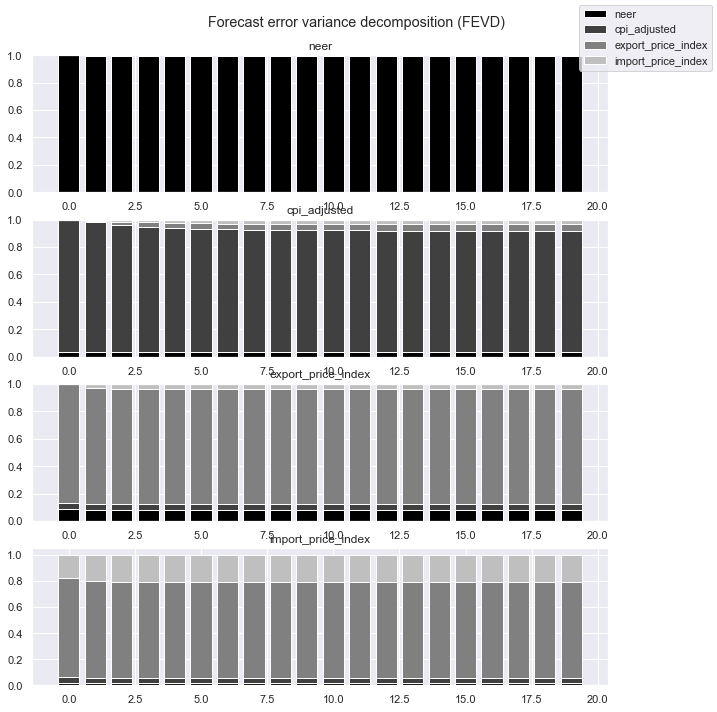

In [24]:
results_file = 'results_lag'+str(selected_order)+'.txt'
structural_file = 'lag'+str(selected_order)
write_results(results_file, results, focused_columns)
structural_analyses(structural_file, results, 20)

### Heterogeneous analysis

Chosen subcategories for export_price_index:
- Machinery and equipment
- Mineral fuels and lubricants
- Chemical and chemical products
- Miscellaneous manufactures
- Manufactured goods

The top 5 commodities exported from Singapore in 2019, ranked by export value of goods. 

In [49]:
focused_columns = [
    'neer', 
    'export_price_index_machinery',
    'export_price_index_manufactured',
    'export_price_index_chem',
    'export_price_index_misc_manufactured',
    'export_price_index_mineral_fuels'
] # NEER with export price index categories

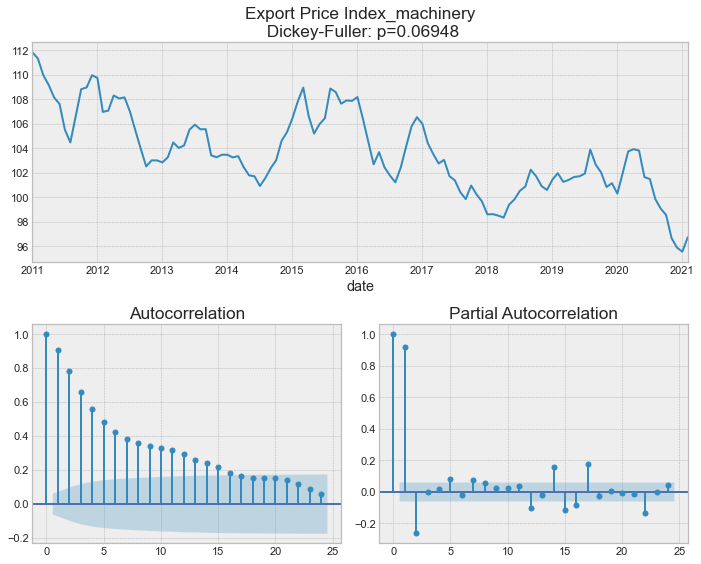

In [36]:
# Data transformation, to check which transformation techniques are needed
tsplot(data.export_price_index_machinery, lags=24, title='Export Price Index_machinery')

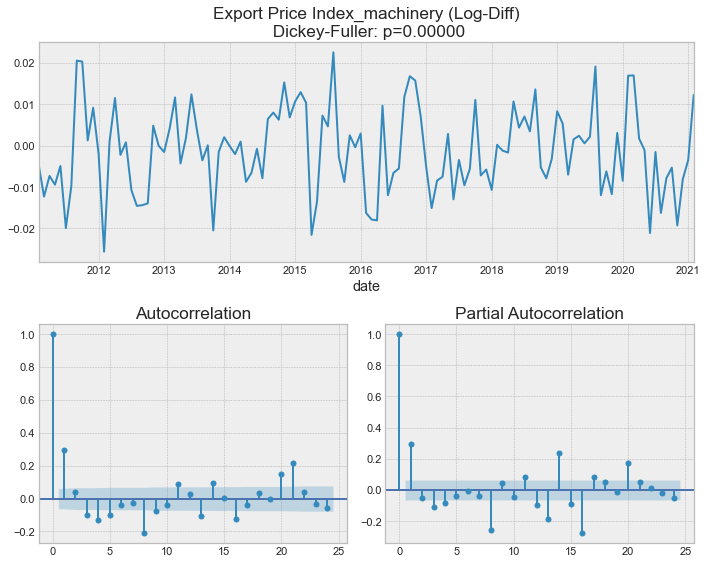

In [40]:
tsplot(np.log(data.export_price_index_machinery).diff().dropna(), lags=24, title='Export Price Index_machinery (Log-Diff)')

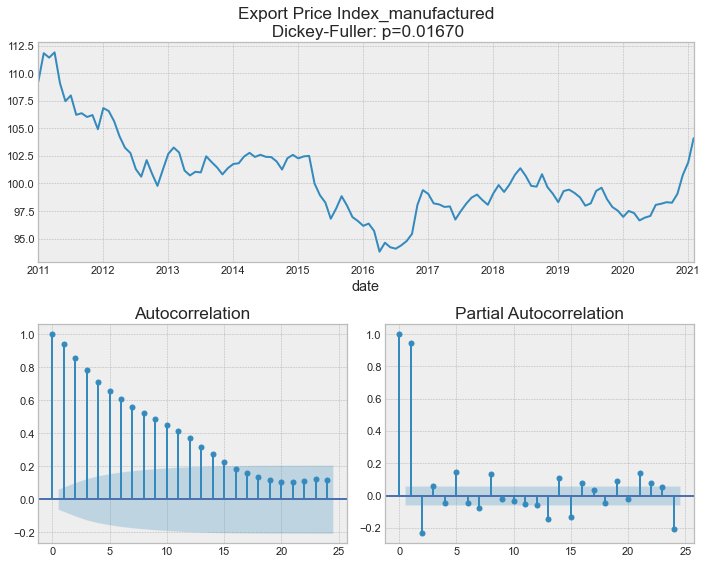

In [41]:
# Data transformation
tsplot(data.export_price_index_manufactured, lags=24, title='Export Price Index_manufactured')

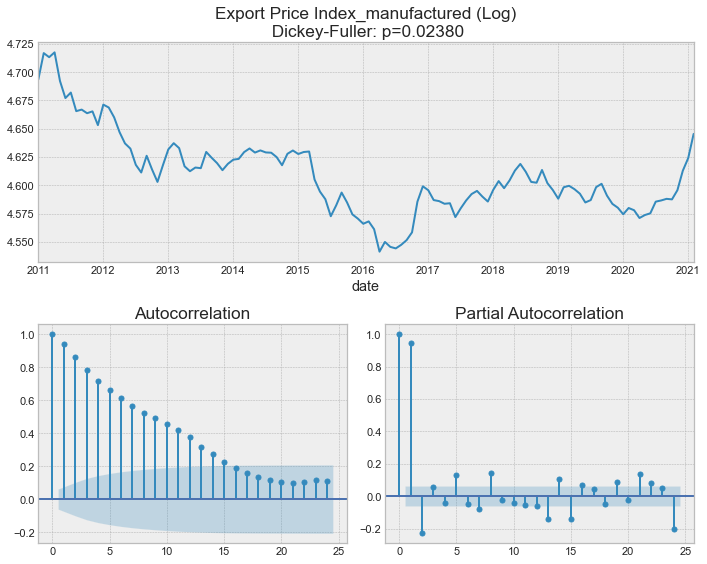

In [51]:
tsplot(np.log(data.export_price_index_manufactured), lags=24, title='Export Price Index_manufactured (Log)')

C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


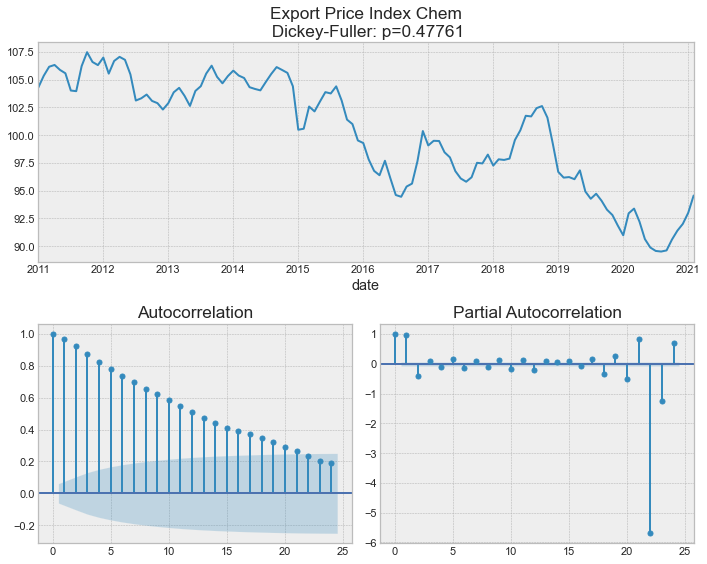

In [42]:
# Data transformation
tsplot(data.export_price_index_chem, lags=24, title='Export Price Index Chem')

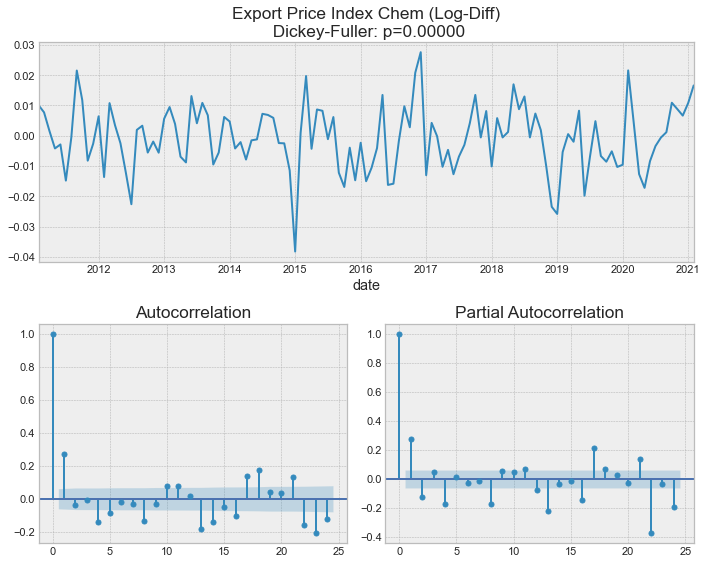

In [44]:
tsplot(np.log(data.export_price_index_chem).diff().dropna(), lags=24, title='Export Price Index Chem (Log-Diff)')

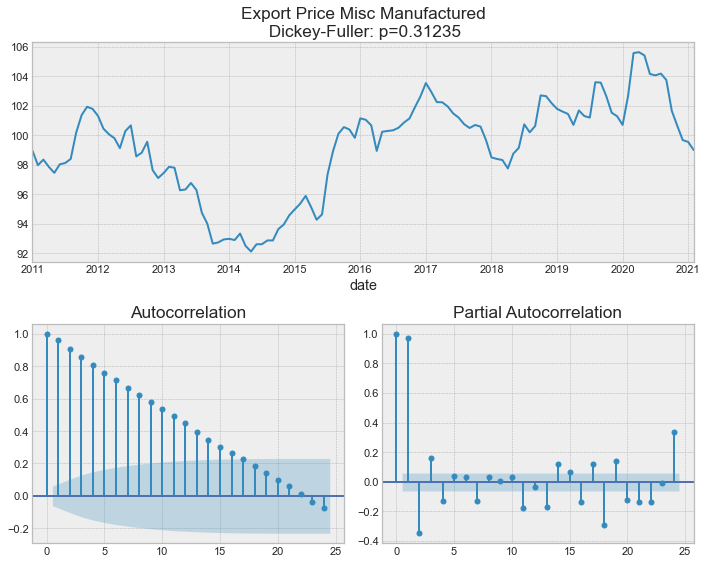

In [45]:
# Data transformation
tsplot(data.export_price_index_misc_manufactured, lags=24, title='Export Price Misc Manufactured')

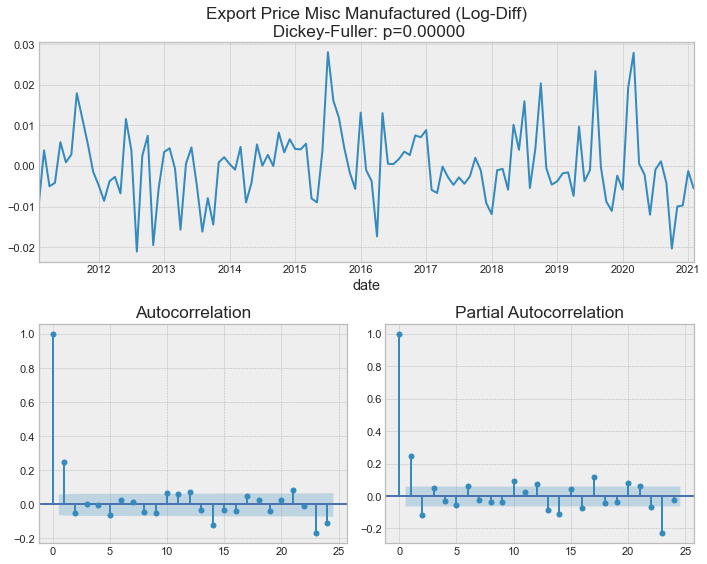

In [46]:
tsplot(np.log(data.export_price_index_misc_manufactured).diff().dropna(), lags=24, title='Export Price Misc Manufactured (Log-Diff)')

C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


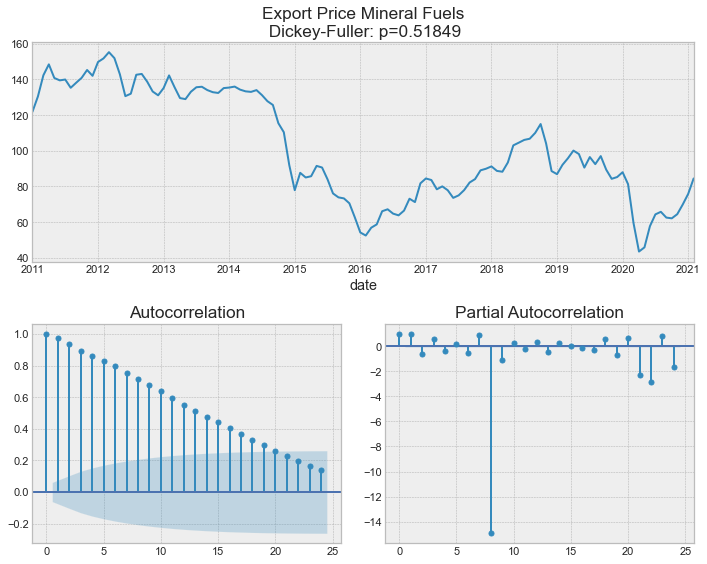

In [47]:
# Data transformation
tsplot(data.export_price_index_mineral_fuels, lags=24, title='Export Price Mineral Fuels')

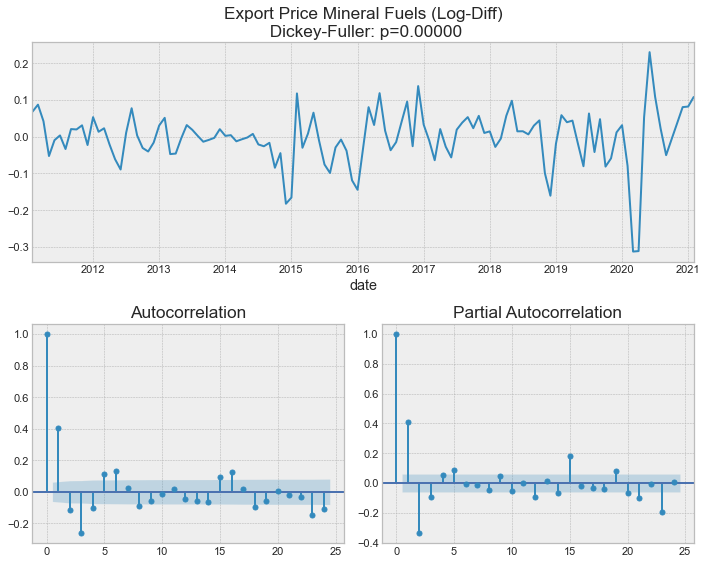

In [48]:
tsplot(np.log(data.export_price_index_mineral_fuels).diff().dropna(), lags=24, title='Export Price Mineral Fuels (Log-Diff)')

In [50]:
focused_data = data[focused_columns] # taking only a subset of the dataframe

In [52]:
focused_data = np.log(focused_data + 1)
focused_data[['neer', 'export_price_index_machinery','export_price_index_chem','export_price_index_misc_manufactured','export_price_index_mineral_fuels']] = focused_data[['neer', 'export_price_index_machinery','export_price_index_chem','export_price_index_misc_manufactured','export_price_index_mineral_fuels']].diff().dropna()
focused_data = focused_data.dropna()
focused_data

,neer,export_price_index_machinery,export_price_index_manufactured,export_price_index_chem,export_price_index_misc_manufactured,export_price_index_mineral_fuels
date,,,,,,
2011-02-01,0.002636,-0.004432,4.725652,0.009970,-0.009893,0.067461
2011-03-01,0.000475,-0.012199,4.722082,0.007634,0.003802,0.086549
2011-04-01,0.007588,-0.007253,4.726308,0.001501,-0.004954,0.041837
2011-05-01,0.004288,-0.009338,4.701235,-0.004174,-0.004095,-0.052418
2011-06-01,0.003085,-0.004877,4.686308,-0.002858,0.005823,-0.009513
...,...,...,...,...,...,...
2020-10-01,0.000959,-0.005251,4.597692,0.010757,-0.020126,-0.006647
2020-11-01,-0.001373,-0.019078,4.605700,0.008696,-0.009868,0.036151
2020-12-01,-0.001284,-0.008071,4.622735,0.006559,-0.009628,0.079329


In [53]:
model = VAR(focused_data)
print(model.select_order(10).summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -52.41      -52.27   1.727e-23      -52.35
1      -55.37*     -54.34*  9.008e-25*     -54.95*
2       -55.29      -53.38   9.826e-25      -54.51
3       -55.15      -52.37   1.141e-24      -54.02
4       -55.07      -51.41   1.271e-24      -53.58
5       -54.78      -50.24   1.778e-24      -52.94
6       -54.55      -49.13   2.380e-24      -52.36
7       -54.31      -48.01   3.341e-24      -51.76
8       -54.27      -47.09   3.992e-24      -51.36
9       -54.05      -46.00   5.943e-24      -50.79
10      -54.13      -45.19   7.058e-24      -50.50
--------------------------------------------------


C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [54]:
orders = [1]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 349.105, critical value: 366.977>, p-value: 0.162>


In [56]:
selected_order = 1
results = model.fit(selected_order) # trend="c" by default
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 19, Apr, 2021
Time:                     16:48:47
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -54.0842
Nobs:                     120.000    HQIC:                  -54.6636
Log likelihood:           2323.95    FPE:                1.22511e-24
AIC:                     -55.0598    Det(Omega_mle):     8.71848e-25
--------------------------------------------------------------------
Results for equation neer
                                             coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------------
const                                          -0.072859         0.060031           -1.214           0.225
L1.neer                                         0.366589        

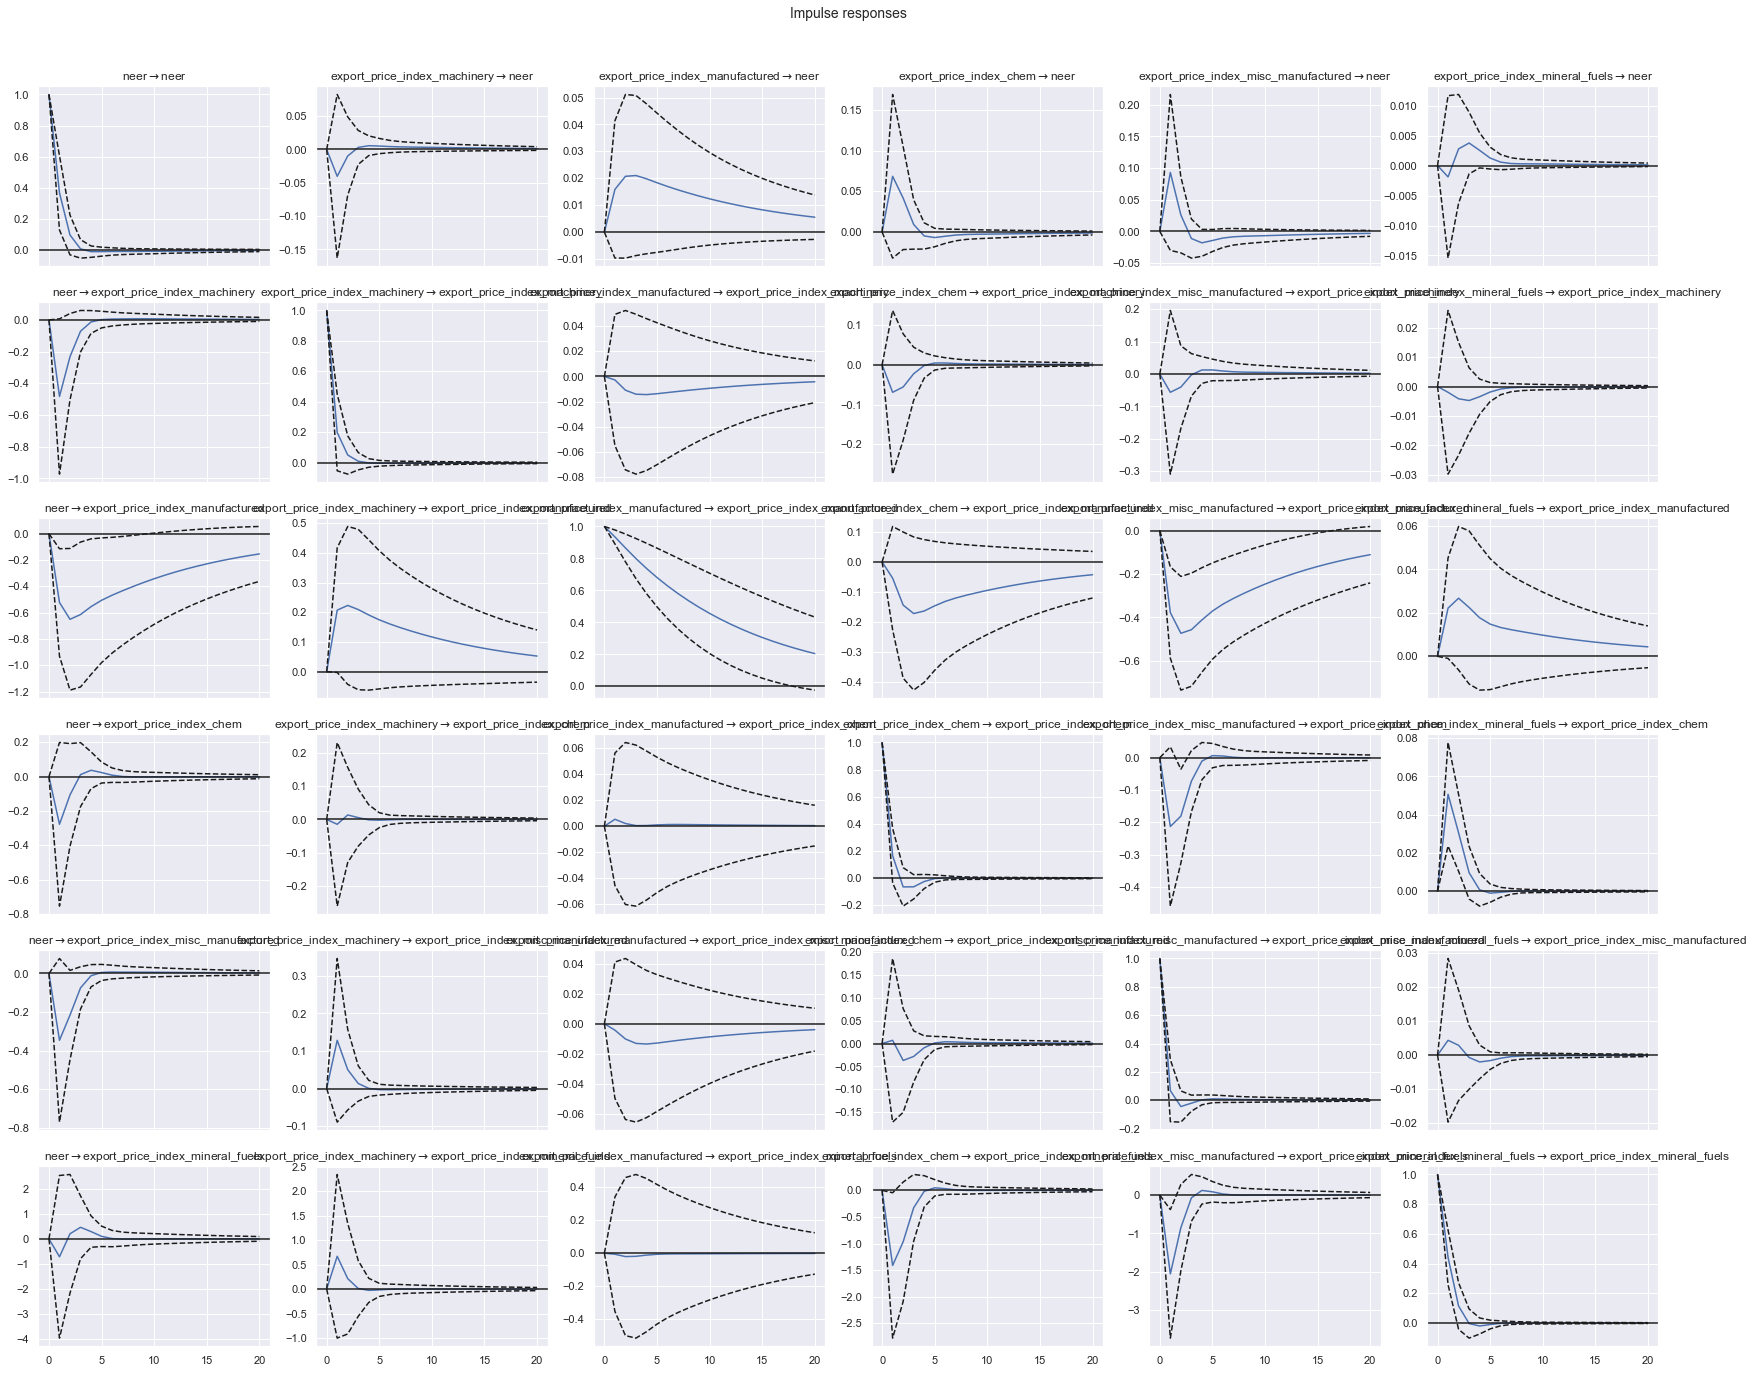

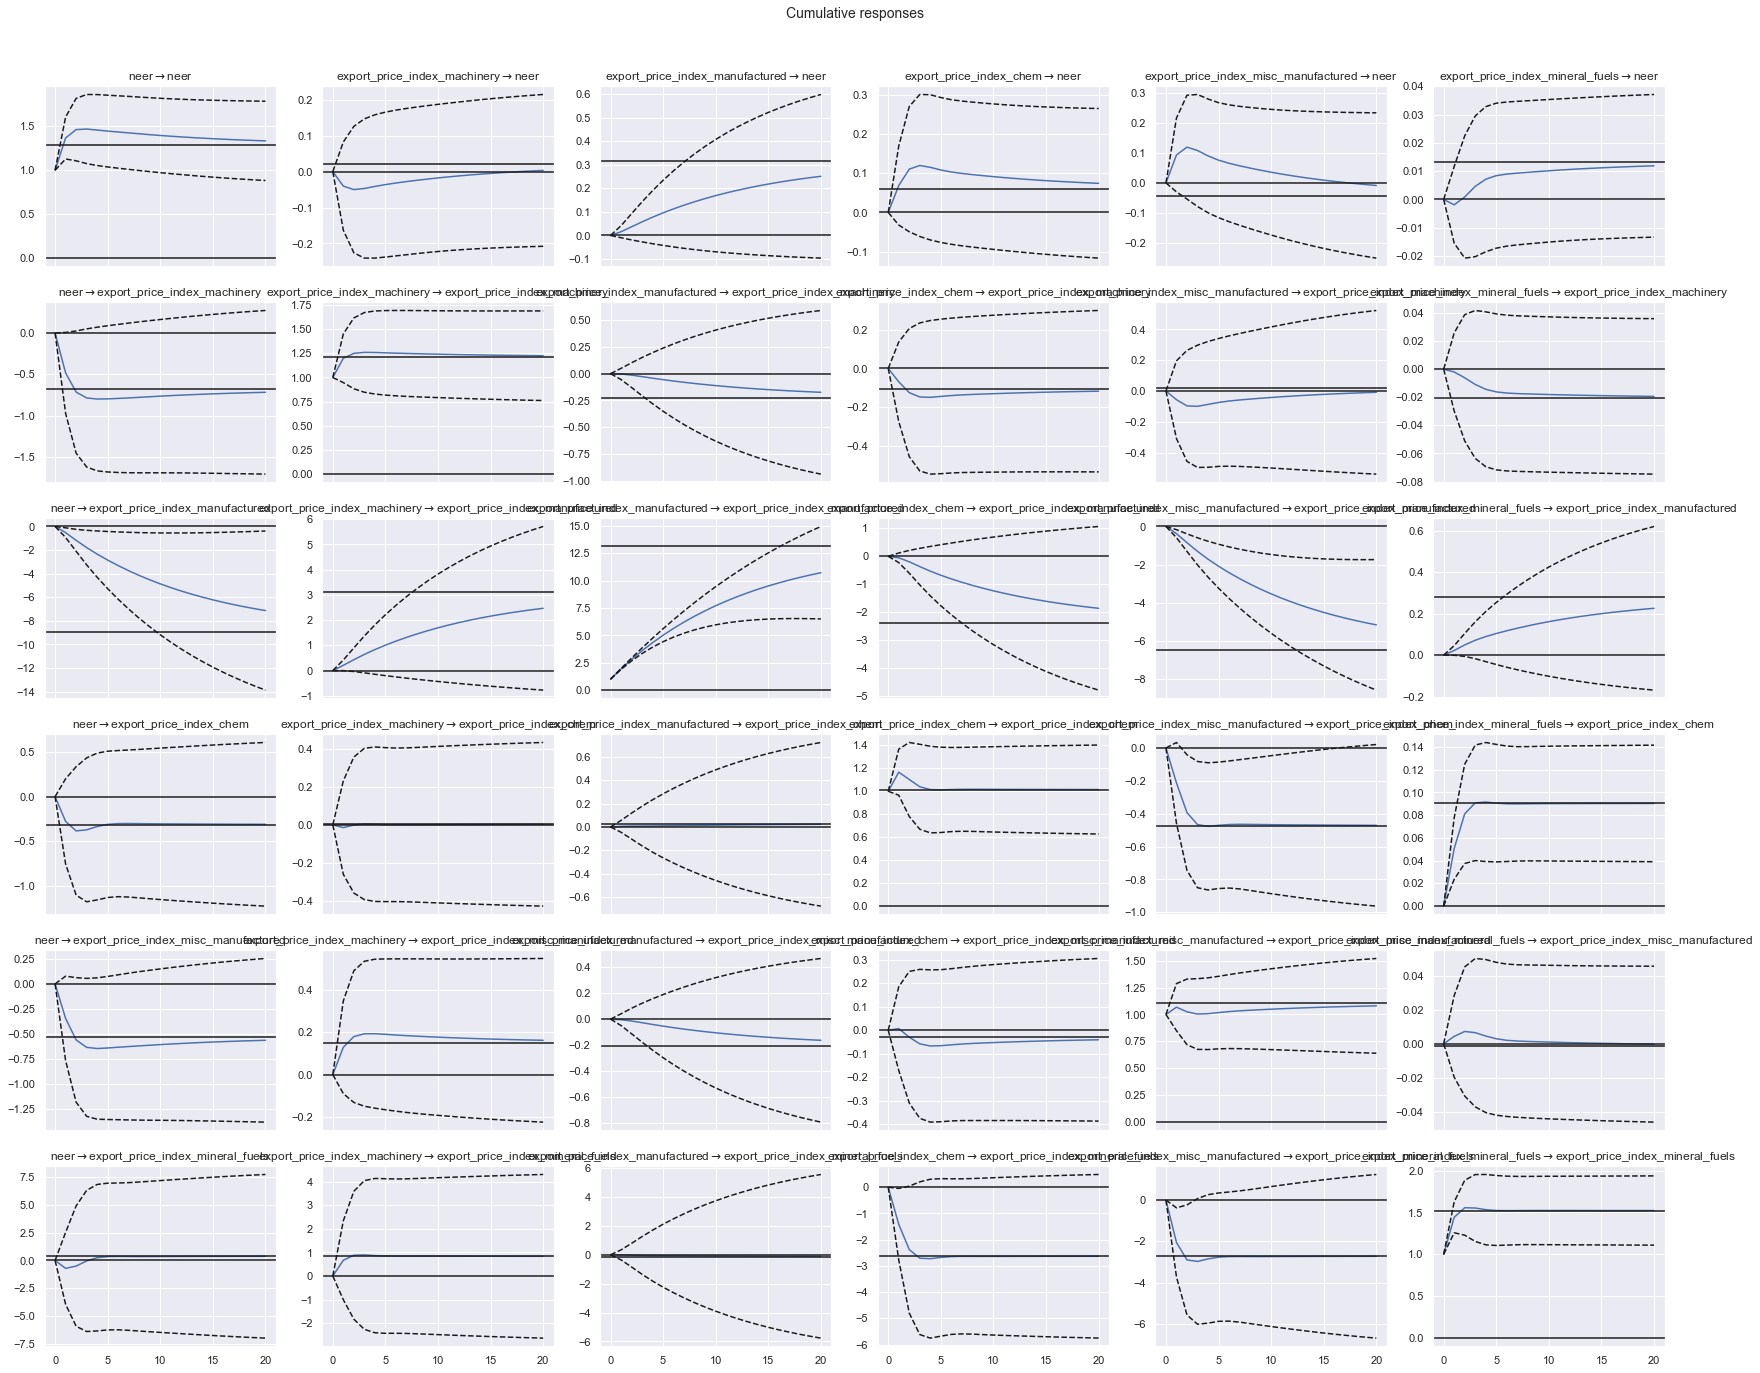

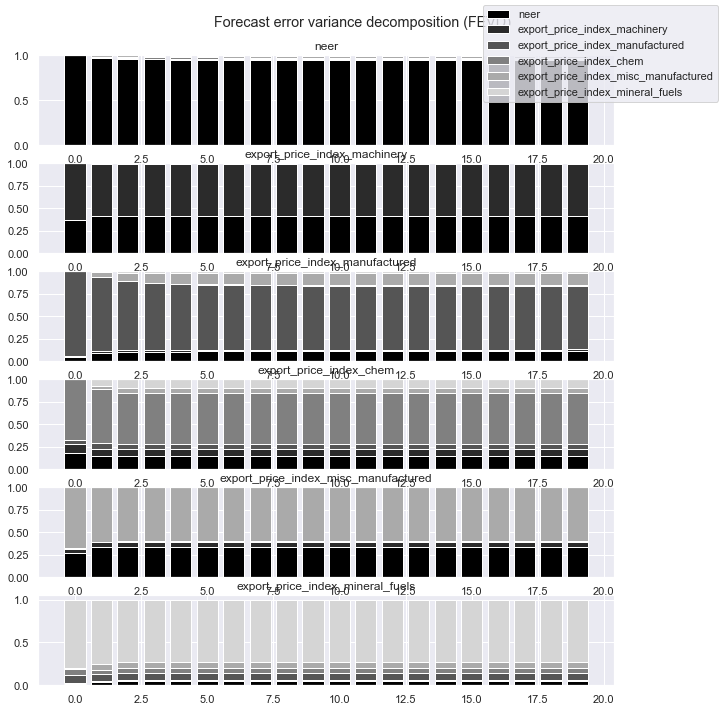

In [57]:
results_file = 'results2_lag'+str(selected_order)+'.txt'
structural_file = 'nlag'+str(selected_order)
write_results(results_file, results, focused_columns)
structural_analyses(structural_file, results, 20)